In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from random import seed, sample, randint
import sys
import numpy as np, numpy.random
import math

In [4]:
seed(1)

In [5]:
sys.path.append('../metrics')

## Accuracy

In [6]:
import accuracy as accuracy

In [7]:
# Data Preparation
# Please note that all datasets are generated randomly. The metric results might be unreasonable.

# Datasets for accuracy - binary labels
accuracy_dataset_columns_continuous = {
    "id": [sample(list(range(1000, 10000)), 1)[0] for _ in range(1000)],
    "labels": [randint(1, 100) for _ in range(1000)],
    "golden_labels": [randint(1, 100) for _ in range(1000)],
    "weight": np.random.dirichlet(np.ones(1000),size=1).tolist()[0]}
data = pd.DataFrame.from_dict(accuracy_dataset_columns_continuous) 
data["labels_binary"] = data.apply(lambda x: "1" if x["labels"] > 20 else "0", axis = 1)
data["golden_labels_binary"] = data.apply(lambda x: "1" if x["golden_labels"] > 20 else "0", axis = 1)
data["labels_category"] = data.apply(lambda x: str(math.floor(x["labels"]/25)),  axis = 1)
data["golden_labels_category"] = data.apply(lambda x: str(math.floor(x["golden_labels"]/25)),  axis = 1)

In [8]:
data.head()

id  labels  golden_labels    weight labels_binary golden_labels_binary  \
0  3201      17             55  0.000500             0                    1   
1  2033      76             79  0.000479             1                    1   
2  5179      37             61  0.001977             1                    1   
3  2931      53             47  0.000478             1                    1   
4  9117      34              3  0.000225             1                    0   

  labels_category golden_labels_category  
0               0                      2  
1               3                      3  
2               1                      2  
3               2                      1  
4               1                      0

### Individual level ###
- prec_recall_f1_report -> precision, recall, f1
- get_continuous_accuracy_report -> KL-Divergence, RMSE
- get_continuous_accuracy_plot

In [9]:
# unweighted
accuracy.prec_recall_f1_report(
    df=data,
    labels_to_measure_column="labels_binary",
    golden_labels_column="golden_labels_binary",
    categorized_buckets=["0", "1"],
)

precision    recall  f1-score  \
0                                            0.193237  0.211640  0.202020   
1                                            0.812106  0.794081  0.802993   
weighted average across classes by support   0.695140  0.684000  0.689409   
macro (average across classes)               0.502671  0.502861  0.502506   
micro (regardless of classes)                0.684000  0.684000  0.684000   

                                            support  
0                                             0.189  
1                                             0.811  
weighted average across classes by support      NaN  
macro (average across classes)                  NaN  
micro (regardless of classes)                   NaN

In [10]:
# weighted
accuracy.get_continuous_accuracy_report(
    df=data,
    labels_to_measure_column="labels",
    golden_labels_column="golden_labels",
    bucket_endpoints=[1, 100, 1],
    cdf_step_size=10,
    weight_column="weight",
    sample_weighted=True,
)

accuracy_metric
rmse                  37.970982
hellinger_dist         0.241517

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/nl/gxgzwfhn32v3kqc704f7f5s40000gn/T/ipykernel_62122/3153690527.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig_weighted.show()


<Figure size 1000x600 with 0 Axes>

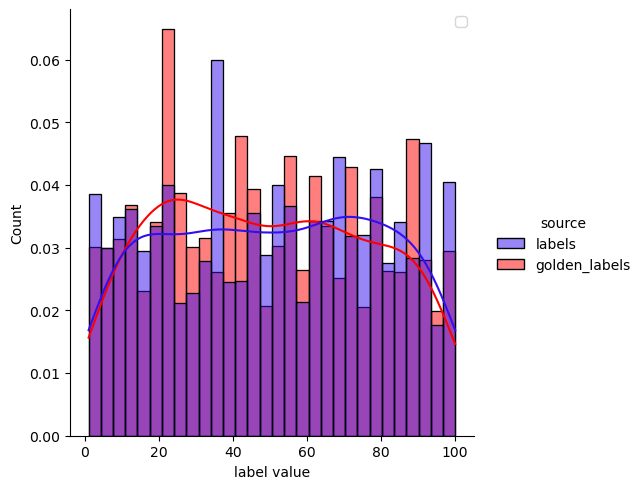

In [11]:
fig_weighted = accuracy.get_continuous_accuracy_plot(
    df=data,
    labels_to_measure_column="labels",
    golden_labels_column="golden_labels",
    id_column = "id", 
    weight_column="weight",
    sample_weighted=True,)
fig_weighted.show()

### Aggregated level metrics ###
- asmd -> ASMD
- one_sample_ttest -> one smaple t test
- two_sample_ttest -> two sample t test
- chisquare_test -> chisquare test
- get_aggregated_accuracy_report -> summary of above metrics 

Note: As to the two sample t test, we use the function statsmodels.stats.weightstats.ttest_ind to calculate the weighted metric, which requires to input frequency weight instead of normalization weight. Therefore, we help convert the normalization weight to frequency weight in our implementaiton. 

In [12]:
# unweighted asmd
asmd_unweighted = accuracy.asmd(df=data, labels_to_measure_column="labels_category", golden_labels_column="golden_labels_category", label_type ="categorical")
one_sample_ttest_unweighted = accuracy.one_sample_ttest(df=data, true_mean=[
            0.17,
            0.36,
            0.30,
            0.16
        ], labels_to_measure_column="labels_category", label_type="categorical")
two_sample_ttest_unweighted = accuracy.two_sample_ttest(df=data, labels_to_measure_column="labels_category", golden_labels_column="golden_labels_category", label_type ="categorical")

classes numbers do not match with golden mean size


In [13]:
print(f"metric result of asmd_unweighted: {asmd_unweighted}")
print(f"metric result of one_sample_ttest_unweighted: {one_sample_ttest_unweighted}")
print(f"metric result of two_sample_ttest_unweighted: {two_sample_ttest_unweighted}")

metric result of asmd_unweighted: [0.007065104240730037, 0.0541223210591239, 3.6632475808101014e-17, 0.03790490217894517, 0.05997170003479988]
metric result of one_sample_ttest_unweighted: None
metric result of two_sample_ttest_unweighted: [(0.1575578217329709, 0.8748211621856106), (-1.227953259758995, 0.2196091526990454), (0.0, 1.0), (0.8374357893586234, 0.4024478132521949), (1.15237276629691, 0.24931516083981567)]
